# Predicting Attendance to a Test Preparation Course Based on Candidates' Scores

## Introduction 

Test preparation courses are a form of shadow education, which refers to "educational activities, such as tutoring and extra classes, occurring outside of the formal channels of an educational system" (Buchmann et al., 436). These preparative courses are used with the intention of increasing students' chances of success in high school courses and gaining admission into the post-secondary institute of their choice. A few companies offering these courses are confident their services and go as far as to offer a return of clients' money if a high score is not achieved (Buchmann et al., 440). 

Predictive Question: Can we use the exam scores of students to predict whether they attended a test preparation course?

The `all_exams.csv` data set is used to determine whether a student took a test prep course. From our initial exploratory data analysis, we were able to narrow down our predictors to the reading and writing exam scores. These scores would be used to identify whether students attended a test preparation course. The data set also contains information about high school students from the US, and includes the students’ gender, race/ethnicity, parental level of education, and lunch access. The size of the sample was increased to 1200 by combining the downloaded data, since the data is generated spontaneously. By doing this, we expect our model to have a higher accuracy because it will be able to gain familiarity with more data examples.

## Methods

### Loading the Data

We began with loading all the libraries necessary for our data analysis in the code block below. 

In [1]:
library(tidyverse)
library(tidymodels)
library(RColorBrewer)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

Table 1 shows the loaded the data from its original source into our notebook. This was done so that we could manipulate it throughout our data analysis. 

**Table 1**

In [2]:
options(repr.matrix.max.rows = 10)
all_exams<-read_csv("https://raw.githubusercontent.com/SopTes27/group26_project/main/GP_data/all_exams.csv")
all_exams

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_double(),
  gender = col_character(),
  `race/ethnicity` = col_character(),
  `parental level of education` = col_character(),
  lunch = col_character(),
  `test preparation course` = col_character(),
  `math score` = col_double(),
  `reading score` = col_double(),
  `writing score` = col_double()
)



X1,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,male,group D,some college,standard,none,69,63,62
2,female,group E,bachelor's degree,free/reduced,completed,65,78,80
3,female,group C,some high school,standard,none,57,56,59
4,female,group D,associate's degree,free/reduced,none,62,73,71
5,male,group C,some college,free/reduced,none,46,52,46
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1196,male,group C,associate's degree,standard,completed,65,63,62
1197,female,group C,some high school,standard,none,69,74,68
1198,female,group D,some college,free/reduced,none,43,48,45


### Wrangling and Cleaning the Data

To wrangle and clean our data, we removed the unnecessary X1 column from the original data set. We also made the gender, race/ethnicity, parental level of education, lunch, and test preparation course columns as factor data types rather than character data types. In addition to that, we changed the names of these columns so that they would be easier to refer to. These initial steps are crucial to the following steps of our data analysis. Without them, we would be unable to apply functions and attempt to create our K-nearest neighbour model. The new, tidy data set is named `tidy_data`

**Table 2**

In [3]:
colnames(all_exams)<-c("X1", "gender", "race_ethnicity", "parental_level_of_education",
"lunch", "test_preparation_course", "math_score", "reading_score", "writing_score")

tidy_data <-select(all_exams, gender:writing_score)%>%
    mutate(across(gender:test_preparation_course, as.factor))
tidy_data

gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
male,group D,some college,standard,none,69,63,62
female,group E,bachelor's degree,free/reduced,completed,65,78,80
female,group C,some high school,standard,none,57,56,59
female,group D,associate's degree,free/reduced,none,62,73,71
male,group C,some college,free/reduced,none,46,52,46
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
male,group C,associate's degree,standard,completed,65,63,62
female,group C,some high school,standard,none,69,74,68
female,group D,some college,free/reduced,none,43,48,45


Using the `tidy_data` created in the previous step, we then selected our target variable and potential predictor variables. Our target variable was the test preparation course column, and the candidates for the predictor values were the math, reading, and writing scores. To specifically choose these columns, we used the select function. The new dataset with the columns of interest is named `exams_data` and is shown in Table 3.

**Table 3**

In [4]:
exams_data<-tidy_data %>%
    select(test_preparation_course, math_score, reading_score, writing_score)
exams_data

test_preparation_course,math_score,reading_score,writing_score
<fct>,<dbl>,<dbl>,<dbl>
none,69,63,62
completed,65,78,80
none,57,56,59
none,62,73,71
none,46,52,46
⋮,⋮,⋮,⋮
completed,65,63,62
none,69,74,68
none,43,48,45


The `exams_data` dataset is split into a training and testing set. The training set will contain 75% of the dataset. The testing set will contain 25% of the data from `exams_data`. The split data will be named `exam_train` and `exam_test`, respectively. In this same coding block, a seed is introduced. The seed is set to 2021 for reproducibility and will stay the same throughout the remainder of the data analysis. 

In [5]:
set.seed(2021)

data_split <- initial_split(exams_data, prop = 0.75, strata = test_preparation_course)
exam_train <- training(data_split)
exam_test <- testing(data_split)

glimpse(exam_train)

Rows: 901
Columns: 4
$ test_preparation_course <fct> none, completed, none, none, none, none, none…
$ math_score              <dbl> 69, 65, 57, 62, 46, 39, 78, 57, 80, 85, 79, 5…
$ reading_score           <dbl> 63, 78, 56, 73, 52, 35, 90, 62, 86, 86, 75, 4…
$ writing_score           <dbl> 62, 80, 59, 71, 46, 28, 84, 54, 91, 84, 71, 3…


### Exploratory Data Analysis - Creating a Summary and Visualization of the `exams_data` Dataset

To avoid any misleading results stemming from incomplete data, we first examined both the testing and training data for any missing values. From Table 4 and 5 below, we observe that there are no missing values in either dataset. 

**Table 4**

In [6]:
sum(is.na(exam_train))

[1] 0

**Table 5**

In [7]:
sum(is.na(exam_test))

[1] 0

Next, we check the number of observations per class in the training data to determine whether there is a class imbalance in the data. Table 6 shows an apparent class imbalance in the training data: there are far more students who did not take a test preparation course than those who did. Roughly 65% of students did not take any test preparation courses, while only 34% did. The significantly large proportion of students who did not attend test preparation courses could result in bias in our data analysis. For this reason, we attempt to balance the data.

**Table 6**

In [8]:
num_obs_train <- nrow(exam_train)
exam_train %>%
  group_by(test_preparation_course) %>%
  summarize(
    count = n(), 
    percentage = n() / num_obs_train 
  )

`summarise()` ungrouping output (override with `.groups` argument)



test_preparation_course,count,percentage
<fct>,<int>,<dbl>
completed,309,0.3429523
none,592,0.6570477


The method of upsampling is conducted on the training dataset to balance the data, as shown below. From Table 7a (the first table in the code below), we can see that there are now equal amounts of students who did and did not take the test preparation course. Table 7b (the second table below) allows us to have a look at some of the values in our balanced training dataset for each predictor and target variable.

**Table 7 (a, b)**

In [9]:
exam_recipe <- recipe(test_preparation_course ~ ., data = exam_train)%>% 
  step_upsample(test_preparation_course, over_ratio = 1, skip = FALSE)%>%
  prep() 
exam_recipe

upsampled_exam <- bake(exam_recipe, exam_train)

upsampled_exam %>%
  group_by(test_preparation_course) %>%
  summarize(n = n())
upsampled_exam

Warning message:
“`step_upsample()` is deprecated as of recipes 0.1.13.
Please use `themis::step_upsample()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          3

Training data contained 901 data points and no missing data.

Operations:

Up-sampling based on test_preparation_course [trained]

`summarise()` ungrouping output (override with `.groups` argument)



test_preparation_course,n
<fct>,<int>
completed,592
none,592


math_score,reading_score,writing_score,test_preparation_course
<dbl>,<dbl>,<dbl>,<fct>
80,79,77,completed
79,71,70,completed
77,82,87,completed
41,53,49,completed
83,66,70,completed
⋮,⋮,⋮,⋮
73,70,71,none
56,66,62,none
58,57,58,none


Table 8 below summarizes the values of the potential predictor variables in the training set which will be used later on in our data analysis. The average of each exam score is shown for students who did and did not complete the test preparation course. 

**Table 8**

In [10]:
predictor_means <- exam_train%>%
    group_by(test_preparation_course)%>%
    summarize(
        math_score_average=mean(math_score),
        writing_score_average=mean(writing_score),
        reading_score_average=mean(reading_score))
predictor_means

`summarise()` ungrouping output (override with `.groups` argument)



test_preparation_course,math_score_average,writing_score_average,reading_score_average
<fct>,<dbl>,<dbl>,<dbl>
completed,70.89644,75.24272,74.23301
none,64.98480,64.67399,66.88514


Table 9 summarizes all the data present in the training data set.

**Table 9**

In [11]:
summary(exam_train) 
do.call(cbind, lapply(exam_train, summary))

 test_preparation_course   math_score     reading_score    writing_score  
 completed:309           Min.   : 14.00   Min.   : 15.00   Min.   : 13.0  
 none     :592           1st Qu.: 56.00   1st Qu.: 59.00   1st Qu.: 58.0  
                         Median : 67.00   Median : 69.00   Median : 68.0  
                         Mean   : 67.01   Mean   : 69.41   Mean   : 68.3  
                         3rd Qu.: 78.00   3rd Qu.: 80.00   3rd Qu.: 79.0  
                         Max.   :100.00   Max.   :100.00   Max.   :100.0  

,test_preparation_course,math_score,reading_score,writing_score
Min.,309,14.00000,15.00000,13.00000
1st Qu.,592,56.00000,59.00000,58.00000
Median,309,67.00000,69.00000,68.00000
Mean,592,67.01221,69.40511,68.29856
3rd Qu.,309,78.00000,80.00000,79.00000
Max.,592,100.00000,100.00000,100.00000


The final step of the exploratory data analysis was to create a visualization representing the relationship that each predictor variable had with each other. To do this, a matrix plot was created. From the matrix plot, we were able to narrow down two predictors we wanted to use in our data analysis: the reading and writing scores. These two predictors were chosen because there was a more definite distinction between the students who did and did not take the test preparation class in the reading distribution plot (third row down, three graphs from the left) and writing distribution plot (final graph in the fourth row). The math score distribution plot (second row down, two graphs from the left) had very little distinction between the two groups, and for this reason it was not chosen as a predictor. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



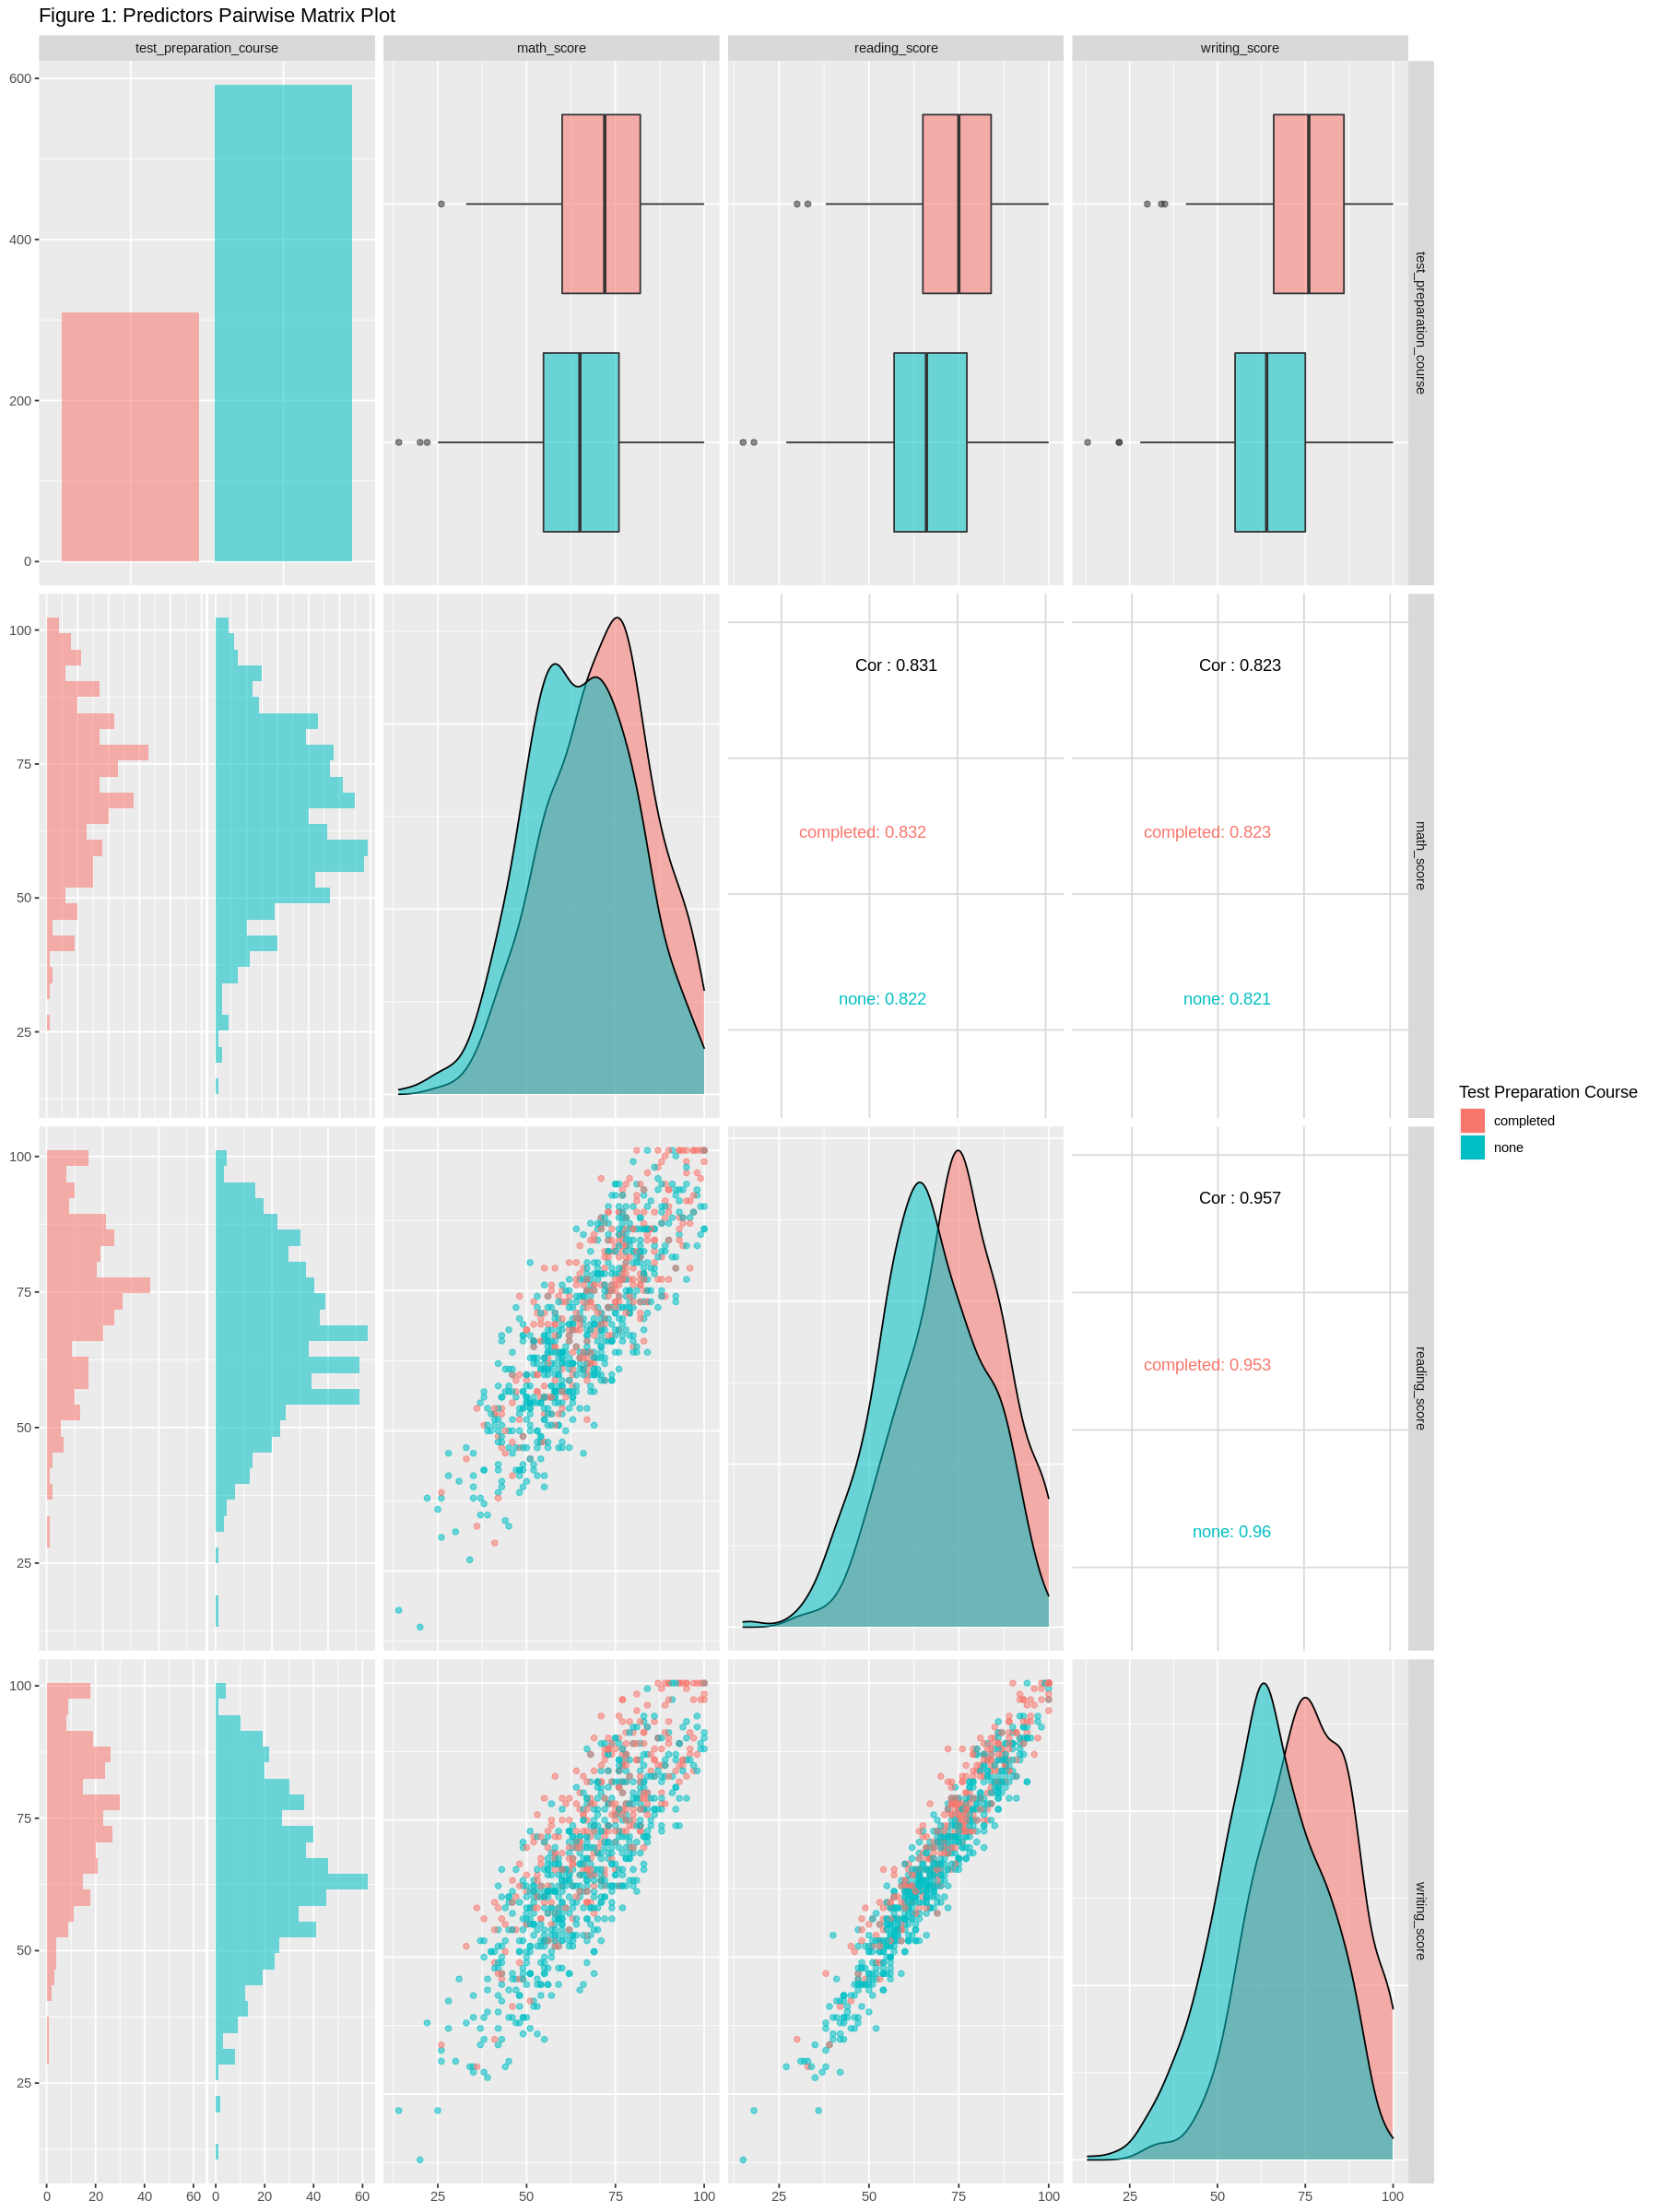

In [12]:
options(repr.plot.width = 15, repr.plot.height = 20) 

predictor_plots<-ggplot(exam_train, aes(x=test_preparation_course, fill=test_preparation_course))+
geom_bar()+
labs(fill="Test Preparation Course")

bar_legend<-grab_legend(predictor_plots)

Pairwise_Matrix_legend<- ggpairs(exam_train, title = "Pairwise Matrix Plot", legend = bar_legend,
                           aes(alpha = 0.2, color = test_preparation_course))+
labs(fill="Test Preparation Course")+
ggtitle("Figure 1: Predictors Pairwise Matrix Plot")
Pairwise_Matrix_legend


### Data Analysis - Performing KNN Classification

Before scaling and centering the data, a 5-fold cross-validation is performed to tune the hyperparameters. The strata argument is set as our categorical target variable, which is the `test_preparation_course`.

In [13]:
exam_vfold <- vfold_cv(exam_train, v = 5, strata = test_preparation_course)

To create our KNN classification model, we will first create a recipe using the training data. The recipe specifies the target variable (test preparation course) and the predictors (reading and writing scores). It also scales and centers the predictors that will be used in the model. 

In [14]:
exam_recipe <- recipe(test_preparation_course ~writing_score+ reading_score, data = exam_train) %>%
                step_scale(all_predictors()) %>%
                step_center(all_predictors())
exam_recipe


Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Scaling for all_predictors()
Centering for all_predictors()

Next, we created the K-nearest neighbors classifier and tuned each parameter in the model. This is done to choose the best value of K in a reasonable range.

In [15]:
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
       set_engine("kknn") %>%
       set_mode("classification")
knn_tune

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


Then, we created a data frame named `k_vals` that has a sequence of K values between 1 and 50 we would like to test out. This new argument is passed through the grid argument of the tune_grid function. To aggregate the mean and standard error of the classifier’s validation accuracy across the folds, the collect_metrics function is used in the same workflow. Table 10 shows an assessment of the model’s accuracy. 

**Table 10**

In [16]:
k_vals <- tibble(neighbors = seq(from = 1, to = 50))
knn_results <- workflow() %>%
       add_recipe(exam_recipe) %>%
       add_model(knn_tune) %>%
       tune_grid(resamples = exam_vfold, grid = k_vals) %>%
       collect_metrics()
accuracies <- knn_results %>% 
       filter(.metric == "accuracy" )
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6370737,5,0.012327148,Model01
2,accuracy,binary,0.6304004,5,0.011253183,Model02
3,accuracy,binary,0.6603456,5,0.012523428,Model03
4,accuracy,binary,0.6603024,5,0.019719266,Model04
5,accuracy,binary,0.6625924,5,0.006921156,Model05
⋮,⋮,⋮,⋮,⋮,⋮,⋮
46,accuracy,binary,0.7059206,5,0.007882749,Model46
47,accuracy,binary,0.7092601,5,0.009008855,Model47
48,accuracy,binary,0.7070255,5,0.007394468,Model48


As the last step of our KNN classification model, we plotted a visualization of the accuracy versus K value (Figure 2) to deduce which K value would be the best. From the plot below, K = 34 would be the best value because it has the highest accuracy on the graph, and values neighbouring 34 do not have any dramatic changes in accuracy. By arranging the means of the K values from greatest to smallest (Table 11), we discovered that K = 49 technically has the greatest accuracy. However, since the K-values vs accuracy plot does not favour 49 neighbours, we concluded that 34 neighbours would be sufficient for our analysis.

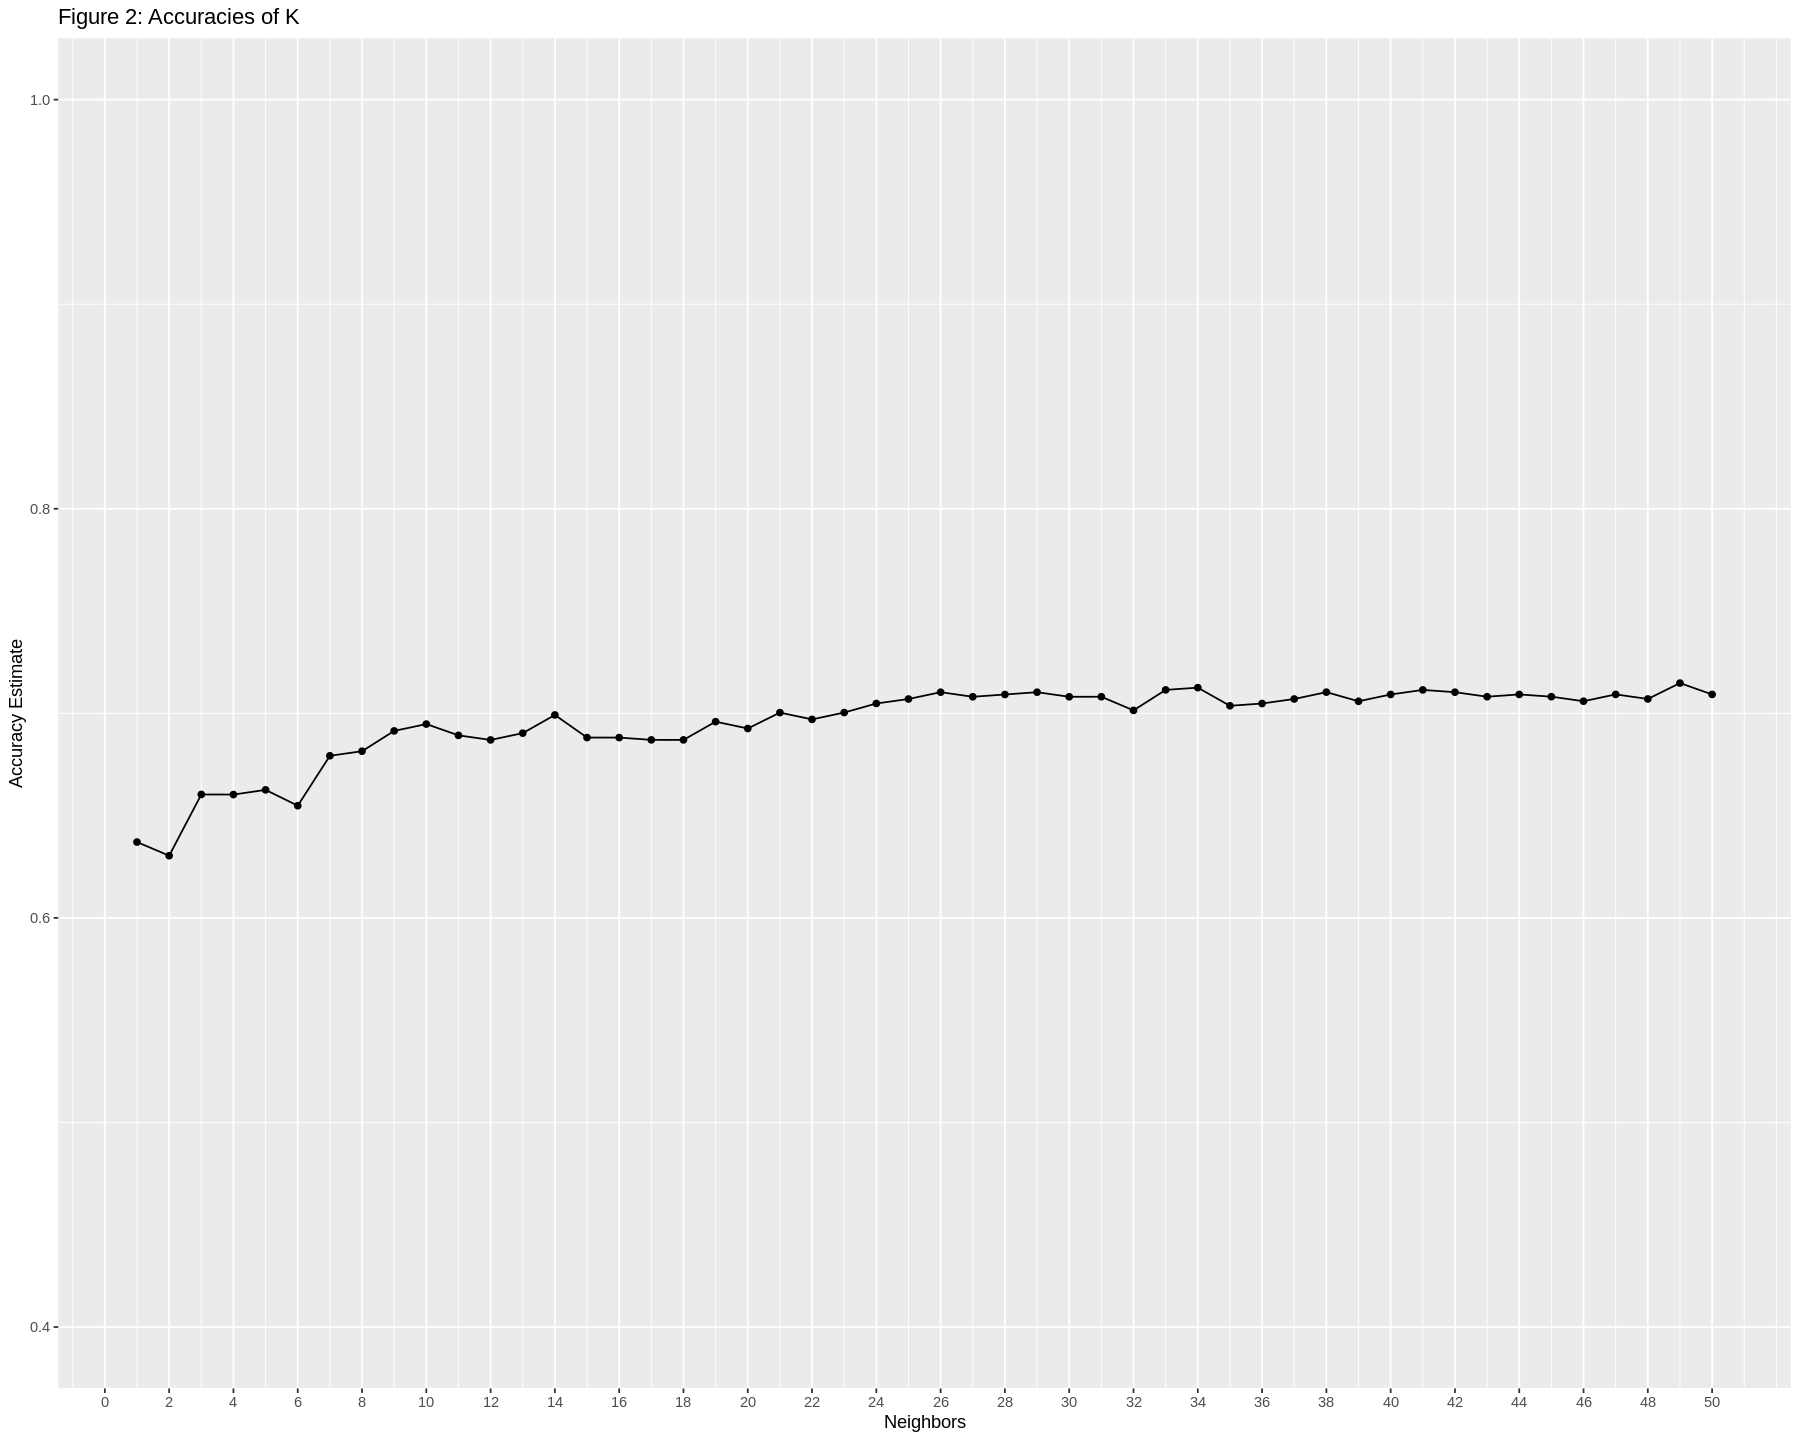

In [48]:
options(repr.plot.width=15, repr.plot.height=12)
accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 50, by = 2)) +  
       scale_y_continuous(limits = c(0.4, 1.0)) +
ggtitle("Figure 2: Accuracies of K")
accuracy_versus_k

**Table 11**

In [18]:
best_k<-accuracies%>%arrange(desc(mean)) 
head(best_k)

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
49,accuracy,binary,0.7147911,5,0.007047377,Model49
34,accuracy,binary,0.7125563,5,0.007543836,Model34
33,accuracy,binary,0.7114575,5,0.007145407,Model33
41,accuracy,binary,0.7114515,5,0.004277057,Model41
38,accuracy,binary,0.7103586,5,0.008849753,Model38
42,accuracy,binary,0.7103403,5,0.004440367,Model42


Now that we have chosen our best K value, we create a new model using the best number of neighbours.

In [19]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 34) %>%
  set_engine("kknn") %>%
  set_mode("classification")
knn_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 34
  weight_func = rectangular

Computational engine: kknn 


Then, the model is fitted to the test data. 

In [20]:
knn_fit <- knn_spec %>%
  fit(test_preparation_course ~writing_score+ reading_score , data = exam_train)

After that, a prediction is made on the test data and the percent accuracy of the models prediction on the test data was determined. We filtered the `accuracy` row since we are interested in that. In Table 12 the `.estimate` variable shows that the estimated accuracy of the classifier on the test data is 70.569%. 

**Table 12**

In [41]:
test_results<-knn_fit%>%
predict(exam_test)%>%
bind_cols(exam_test)

exam_acc<-test_results%>%
metrics(truth=test_preparation_course, estimate=.pred_class)%>%
filter(.metric=="accuracy")
exam_acc

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7056856


### Visualization of the Data Analysis

To visualize our the accuracy of our model, we created a confusion matrix (Table 13) and a decision boundary graph (Figure 3) using the chosen predictors of the students’ reading and writing scores. The blue and orange shaded areas of Figure 3 indicate what classification a new point would be given if it were inserted into the plot. Figure 3 would be used to make predictions on new observations, while the confusion matrix gives us a better quantitative sense of the accuracy of our model. From Table 13, we can see that the classifier correctly classified 34 students of completing the course and 177 of not having completed the course. The classifier incorrectly classified 20 students as having completed the test preparation course but in reality that had not. It incorrectly classified 68 students as not completing the course but in reality, they have.  So the actual amounts of students that have completed and not completed the course are respectively 102 and 197. The model identifies fewer students that have completed the course (predicted 54), and more students who have not (predicted 245). This is reiterated by Figure 3, where many points do not lie in the correct shaded area of the graph. 

Though we have upsampled our data already, the model still fails to correctly classify students who have and have not taken the test preparation course. This is credited to the remaining class imbalance despite our efforts to balance the data. In this case, accuracy would not be a good metric to evaluate our classifier due to the insurmountable class balance that affects our data. 



**Table 13**

In [30]:
conf_mtrx<-test_results%>%
conf_mat(truth=test_preparation_course, estimate=.pred_class)
conf_mtrx

           Truth
Prediction  completed none
  completed        34   20
  none             68  177

In [23]:
wri_grid<- seq(min(exam_test $ writing_score), 
                max(exam_test $ writing_score), 
                length.out = 100)
read_grid <- seq(min(exam_test $ reading_score), 
                max(exam_test $ reading_score), 
                length.out = 100)

In [24]:
asgrid <- as_tibble(expand.grid( writing_score = wri_grid,
                                reading_score = read_grid))

In [25]:
knnPredGrid <- predict(knn_fit, asgrid)%>%
bind_cols(asgrid)%>%
rename(test_preparation_course = .pred_class)
knnPredGrid

test_preparation_course,writing_score,reading_score
<fct>,<dbl>,<dbl>
none,16.00000,19
none,16.84848,19
none,17.69697,19
none,18.54545,19
none,19.39394,19
⋮,⋮,⋮
completed,96.60606,100
completed,97.45455,100
completed,98.30303,100


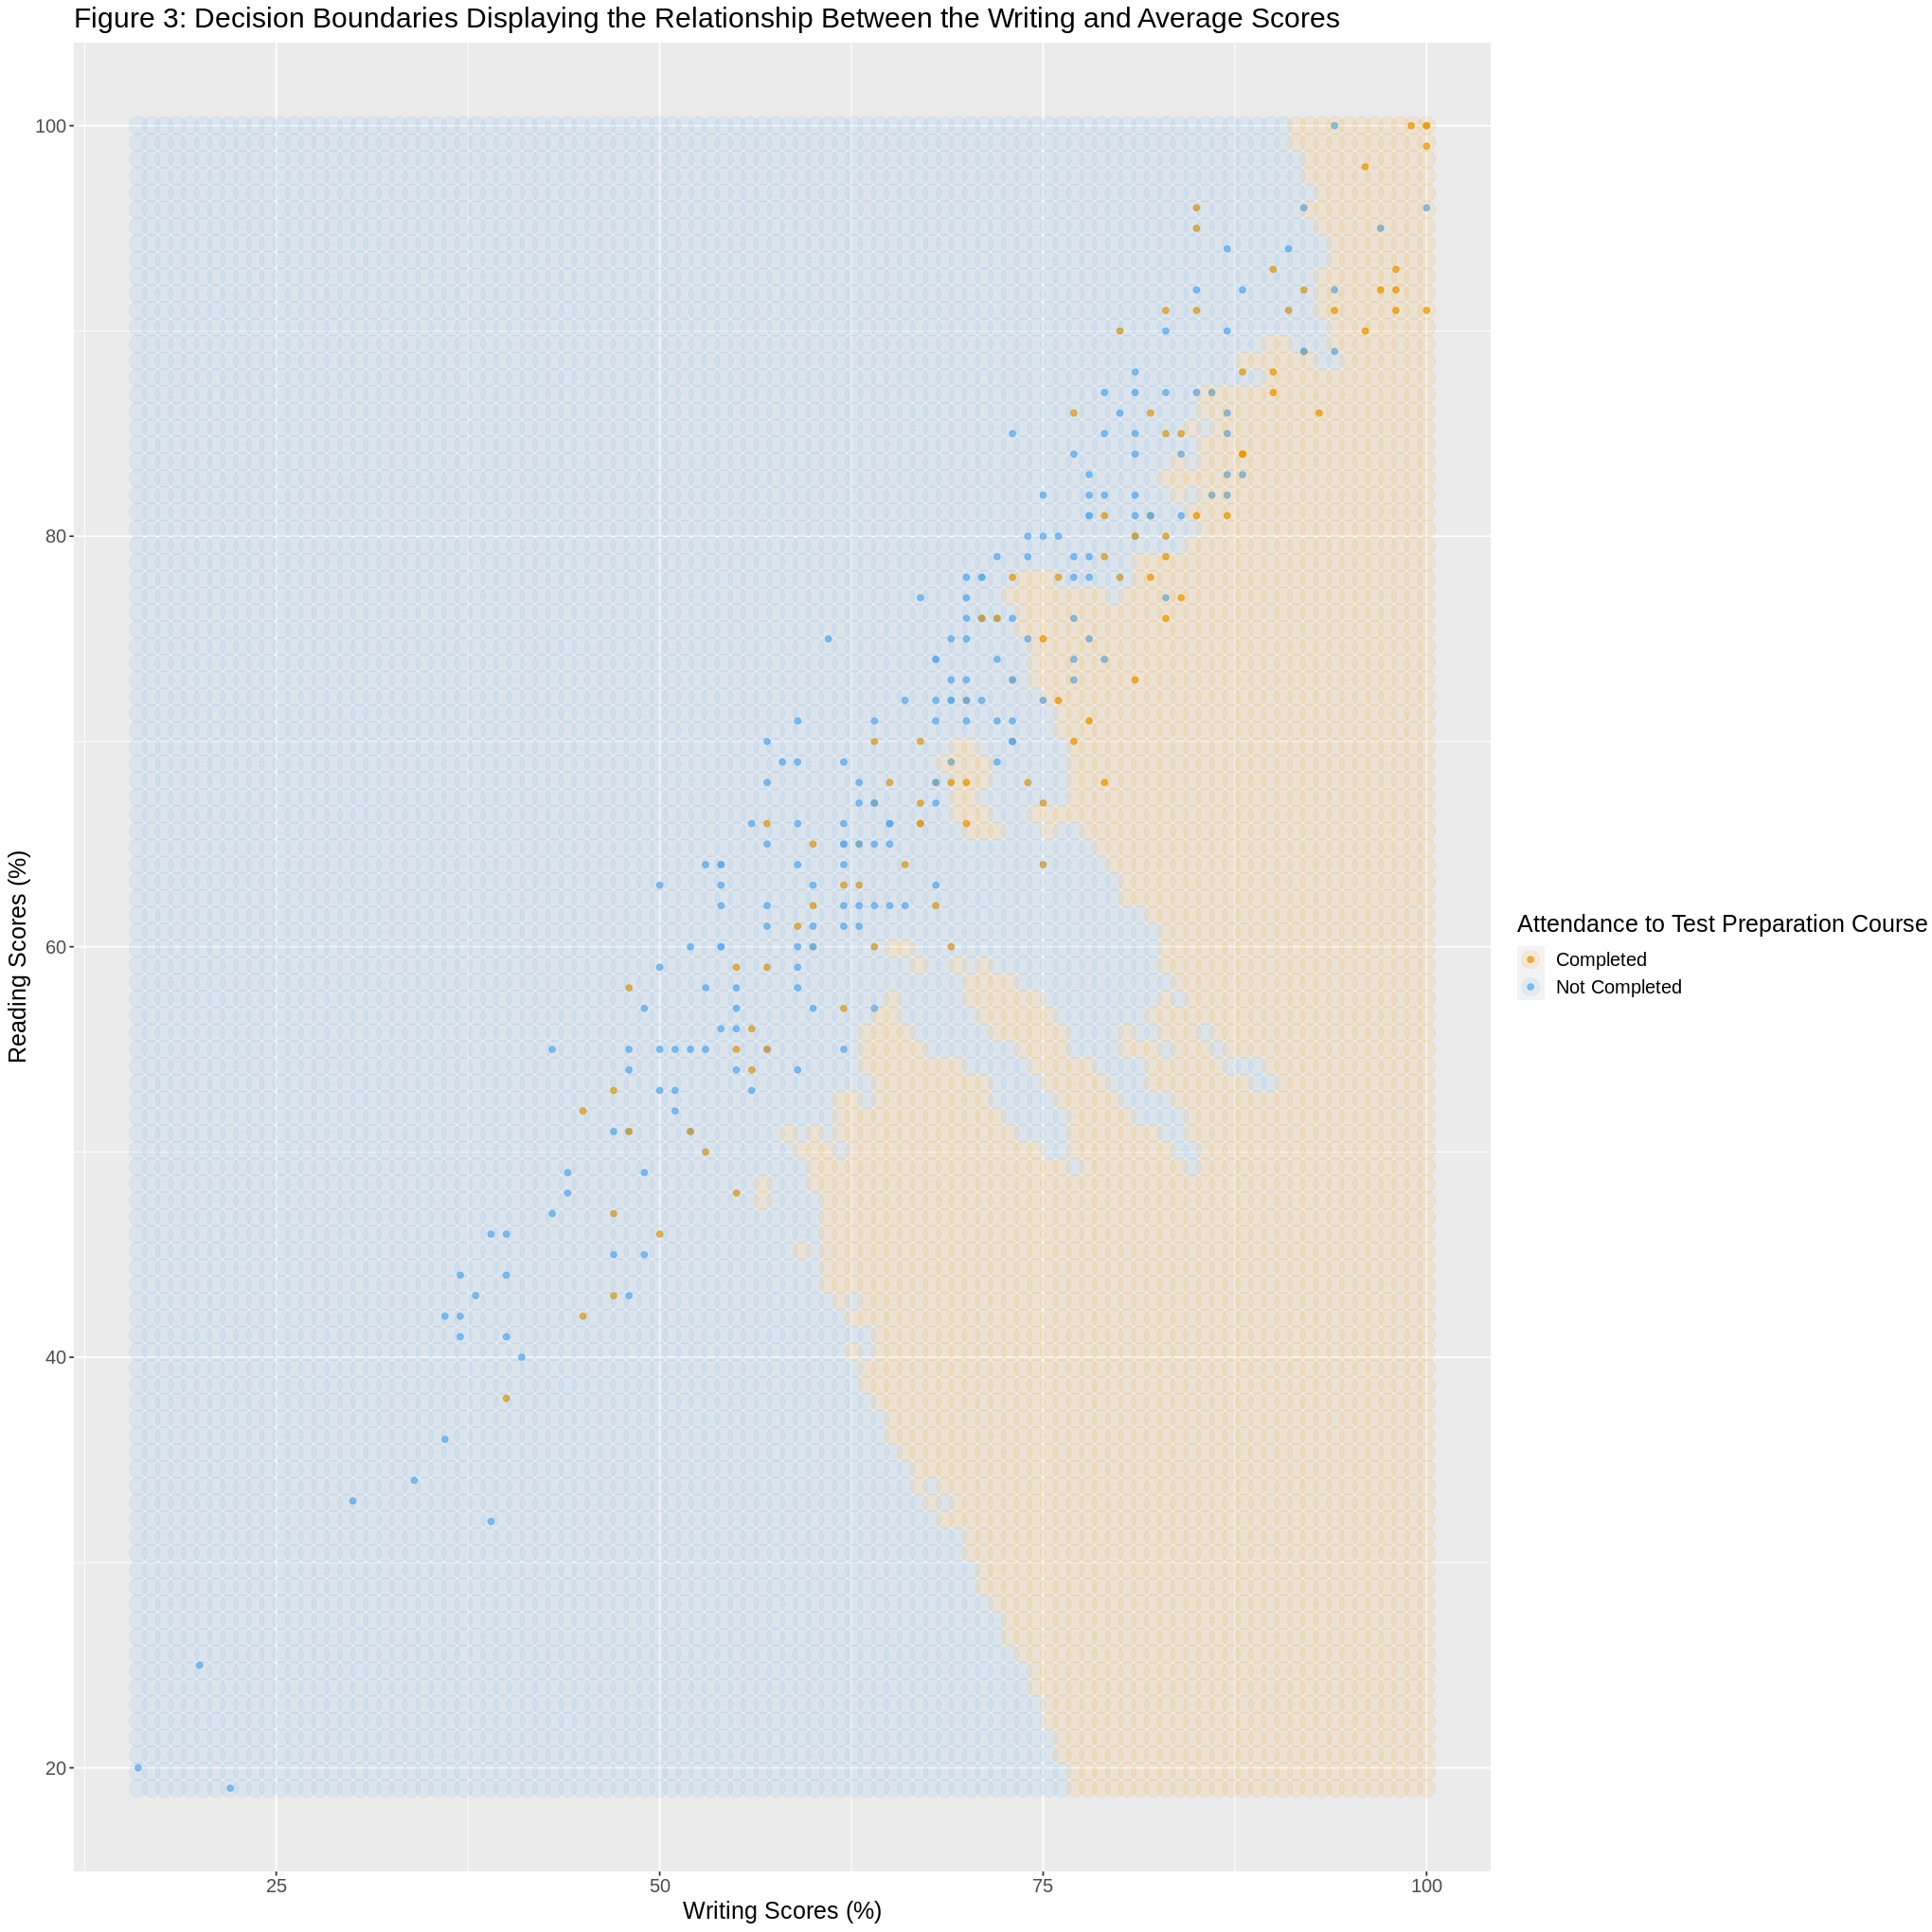

In [42]:
options(repr.plot.width=17, repr.plot.height=17)
wkflw_plot <-
  ggplot() +
  geom_point(data = exam_test, 
             mapping = aes(x = writing_score, 
                           y = reading_score, 
                           color = test_preparation_course), 
             alpha = 0.75) +
  geom_point(data = knnPredGrid, 
             mapping = aes(x = writing_score, 
                           y = reading_score, 
                           color = test_preparation_course), 
             alpha = 0.1, 
             size = 5) +
  labs(color = "Attendance to Test Preparation Course", 
       x = "Writing Scores (%)", 
       y = "Reading Scores (%)") +
  scale_color_manual(labels = c("Completed", "Not Completed"), 
                     values = c("orange2", "steelblue2"))+
ggtitle("Figure 3: Decision Boundaries Displaying the Relationship Between the Writing and Average Scores")+
theme(text = element_text(size = 15))
wkflw_plot


### Discussion

Our model attempted to predict whether a student attended a test prep course based on their reading, writing and average scores. However, using accuracy is not the best metric to evaluate our classifier due to the class imbalance that remains despite our efforts to balance the data. For this reason, our model has a low accuracy, and struggles to correctly predict whether students have taken the test preparation course. 

Based on previous studies on the topic of test preparation scores, it has been shown that students who had attended test preparation courses received higher scores than those who studied independently (Buchmann et al., 450). Although the increase in scores was not significantly high, it was noticeable enough to improve students’ chances of being admitted into their choice of college (Buchmann et al., 450). This information led us to expect a correlation between high exam scores and the completion of test preparation scores. The failure of the classifier to correctly identify students who did and did not complete the test preparation course could result in students having to retake the test preparation course despite already completing it. It could also mean that students might end up skipping this course entirely if the classifier claims that a student has completed this course even if they have not. 

Previous literature that examined the effects of test preparation courses founded our expectation that students who completed the test preparation course would score higher than students who did not. However, our data analysis showed that many students who completed the test preparation course had similar performances to those who did not complete the course. There was not as large of contrast in the exam score in the two groups of students as we were expecting. This could imply that the test preparation course was not nearly as effective as we hoped to believe, or that extenuating factors that are not included in this study had a large effect on students’ studying as well. 

The information extracted from this data analysis is important in determining the effectiveness of the test preparation course in students’ performance. Based on the results of this analysis, future projects could examine the impact of the test preparation courses compared to self-studying methods in students. Other factors that have not been considered in this data set could also be explored. For example, it has been shown that taking test preparation courses in certain years may be more effective than others when studying for college exams (Devine-Eller, 475). Future studies may be interested in determining the potential benefits and detriments to attending test preparation studies at different periods of a student’s high school career. 

### References

Alon, S. "Commentaries: Racial Differences in Test Preparation Strategies: A Commentary on Shadow Education, American      Style: Test Preparation, the SAT and College Enrollment." *Social Forces*, vol. 89, no. 2, 2010, pp. 463-474.

Devine-Eller, Audrey. “Timing Matters: Test Preparation, Race, and Grade Level.” *Sociological Forum*, vol. 27, no. 2, [Wiley, Springer], 2012, pp. 458–80, http://www.jstor.org/stable/23262117.

Kimmons, Royce. “Exams Scores For Students at a Public School.” *Exam Scores*, http://roycekimmons.com/tools/generated_data/exams. 